# Preprocesamiento de datos
 Cualquier análisis de datos comienza con la carga de datos en un data frame. Normalmente los datos brutos deben limpiarse y prepararse para su análisis. Este proceso suele incluir las siguientes tareas:

1.   Reestructuración del data frame.
2.   Selección de las variables (columnas) de interés.
3.   Filtrado de los casos (filas) de interés.
4.   Cálculo de nuevas variables a partir de las existentes.
5.   Ordenación de datos.
6.   Agrupación de datos.
7. Tratamiento de datos no disponibles (NA, NaN).









## Conjuntos de datos ordenados

Existen dos formas habituales de disponer los datos de un estudio en un **data frame** o un **tibble**: formato ancho y formato largo.
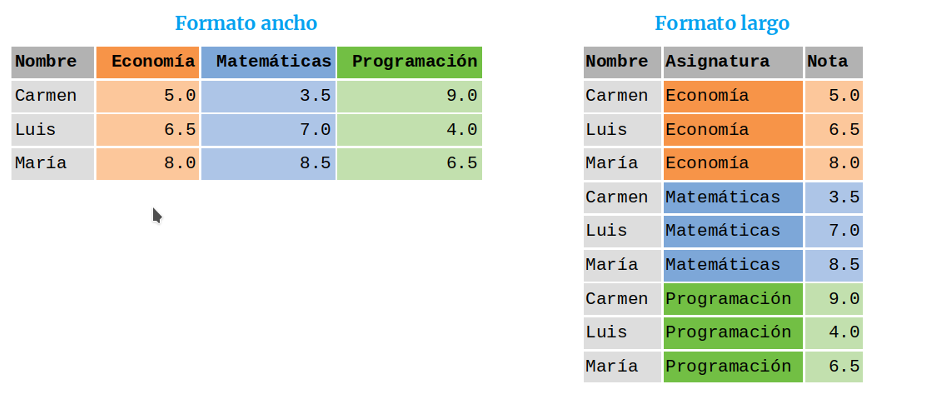


La mayoría de los paquetes de tidyverse asumen que los datos del data frame o tibble
 están en formado largo, lo que significa que las columnas del data frame representan
 variables y las filas observaciones, de manera que cada dato pertenece a una variable
 y una observación única.

En R, el cambio de formato de ancho a largo se puede realizar utilizando las funciones de las bibliotecas tidyr o data.table. La función más común es pivot_longer() de tidyr.

Sintaxis básica de pivot_longer():

In [ ]:
pivot_longer(data, cols = columnas_a_convertir, names_to = "nombre_variable", values_to = "nombre_valores")


## La colección de paquetes tidyverse
 tidyverse es una colección de paquetes para la Ciencia de Datos. Incluye los siguientes
 paquetes:
 1. tibble: Define la estructura de datos tibble que es una versión mejorada de los
 data frames.
 2. readr: Proporciona funciones para la lectura y escritura de tablas de datos en
 formato plano csv y tsv.
 3. tidyr:Proporciona funciones para la limpieza y preparación de los datos de manera
 consistente.
 4. dplyr: Proporciona una gramática de funciones para la manipulación de datos y las tareas más habituales de preprocesamiento.
 5. stringr: Proporciona funciones especializadas en la manipulación de cadenas.
 6. forcats: Proporciona funciones especializadas en la manipulación de factores.
 7. purrr: Proporciona funciones para la programación funcional que mejoran las ya
 existentes en R.
 8. ggplot2: Proporciona una gramática de funciones para la realización de gráficos.



## El paquete dplyr
 Las
 funciones de preprocesamiento más habituales incluidas en el paquete dplyr son:
 1. count: Cuenta el número de observaciones de un data frame.
 2. select: Selecciona un subconjunto de columnas de un data frame.
 3. filter: Selecciona un subconjunto de filas de un data frame.
 4. arrange: Reordena las filas de un data frame.
 5. rename: Renombra las columnas de un data frame.
 6. mutate: Añade nuevas columnas a un data frame o transforma las existentes.
 7. summarise: Genera resúmenes estadísticos de las columnas de un data frame.
 8. group_by: Divide las filas de un data frame en grupos de acuerdo a una columna categórica





## Conteo del número de observaciones
Para contar el número de observaciones (filas) de un data frame se utiliza la función
* count(df, columnas): Devuelve el número de filas del data frame df para ca
da posible combinación de los valores de las columnas indicadas en el parámetro
 columnas.



In [ ]:
# Contar las filas del data frame
count(df)



##  Selección de variables
 Para seleccionar un subconjunto de variables de un data frame se utiliza la función
 * select(df, columnas): Devuelve un tibble con las columnas indicadas en el pa
rámetro columnas del data frame df.

In [ ]:
# Seleccionar las columnas nombre, sexo y edad
 select(df, nombre, sexo, edad)
#Seleccionar la primerayterceracolumnas
 select(df,1,3)
#Seleccionar las columnasdesdeelpesohastaelcolesterol
 select(df,peso:colesterol)
#Seleccionar todas lascolumnasmenoslaedad
 select(df,-edad)

## Filtradodedatos
 Parafiltrarundataframeyquedarseconlasfilasquecumplenunacondiciónseusala
 función
 * filter(df, condicion):Devuelveel tibbleconlasfilasdeldata framedfque
 cumplenlacondiciónindicadaenelparámetrocondición.

In [ ]:
#Filtrar las mujeres
 filter(df,sexo == "M")
#Filtrar los hombresmayoresde30
 filter(df,sexo == "H"&edad >30)
#Filtrar las filas convaloresdecolesterol
 filter(df,!is.na(colesterol))


Existe un filtro bastante habitual que consiste en eliminar las filas de un data frame que contienen algún dato no disponible(NA).Paraellodplyrdisponedelafunción
 * na.omit(df):Devuelve el tibble que resulta de eliminar las filas del data frame df con algún valor NA

In [ ]:
 na.omit(df)

## Reordenación de datos
 Para reordenar las filas de un data frame se utiliza la función
 •arrange(df, columnas):Devuelve un tibble con las mismas filas del dataframe
 df pero ordenadas deacuerdo a los valores de las columnas indicadas en el parámetro columnas. Pordefecto, la ordenación es ascendente,para hacerla descendente, hay que aplicar la función desc()a la columna con respecto se quiere ordenar descendentemente


In [ ]:
 #Ordenar segúnalfabéticamentepornombre
 arrange(df, nombre)
 #Ordenar segúnsexoyedad
 arrange(df, sexo,edad)
 #Ordenar ascendentemente porsexoydescendentementeporcolesterol
 arrange(df, sexo,desc(colesterol))



## Renombrado de columnas
 Para cambiar el nombre de las columnas se utiliza la función
 * rename(df, nuevo-nombre = columna): Devuelve un tibble con los mismos datos
 del data frame df pero cambiando el nombre de la columna de nombre columna
 por nuevo-nombre.

In [ ]:
 # Cambia nombre de la columna a estatura
 rename(df, estatura = altura)

## Creación de nuevas columnas o transformación de las existentes
 Para crear una nueva columna a partir de otras columnas del data frame se utiliza la función
 *  mutate(df, columna = formula): Devuelve el tibble que resulta de añadir una
 nueva columna al data frame df con el resultado de aplicar el procedimiento indicado por formula y con el nombre indicado en columna. Si columna es el nombre de una columna ya existente, entonces esa columna se reescribe con los resultados de aplicar la formula.


In [ ]:
#Cambiar las unidadesde laalturaacentímetros
 mutate(df,altura= altura*100)
#Calcularel índicedemasacorporal
 mutate(df,imc = round(peso/altura^2))


## Resumen de datos
 Para aplicar una función resumen a una o varias columnas de un data frame se utiliza la función
 * sumarise(df, nombre-columna = funcion-resumen(columnas)):
 Devuelve
 el tibble con la columna de nombre nombre-columna y el valor que resulta de
 aplicar la función indicada en funcion-resumen a las columnas del data frame df
 indicadas en columnas.

In [ ]:
# Calcular la media de la edad
 summarise(df, edad_media = mean(edad))

# Calcular la media y la desviación típica del colesterol
 summarise(df, media = mean(colesterol, na.rm=T), sd = sd(colesterol, na.rm=T))

##  Resúmenes por grupos

La función summarise suele combinarse con la siguiente función para obtener resúmenes estratificados por grupos.
* group_by(df, columnas): Devuelve un tibble estratificado de acuerdo a las ca
tegorías de las columnas indicadas en columnas. En combinación con la función
 summarise permite hacer resúmenes estadísticos por grupos.

In [ ]:
# Estratificar por sexo
 df.sexo <- group_by(df, sexo)
 # Edades medias por sexo
 summarise(df.sexo, edad_media = mean(edad))
# Media y desviación típica del colesterol por sexo
 summarise(df.sexo, media = mean(colesterol, na.rm=T), sd = sd(colesterol, na.rm=T))

## Composición de operaciones mediante tuberías
dplyr permite componer varias operaciones sobre un data frame mediante el operador
 %>% (pipe), de manera que el data frame que resulta de aplicar una operación se convierte
 en el data frame de entrada para otra, siguiendo el esquema
 df %>% operación-1 %>% operación-2 %>% ...
 Cuando se utilizan tuberías para componer operaciones de esta forma, no es necesario
 indicar el data frame como parámetro de la función que define la acción ya que automá
ticamente se toma el data frame que resulta de la operación anterior.

In [ ]:
 # Inicio de la tubería
 df %>%
 # Seleccionar sexo, edad y colesterol
 select(sexo, edad, colesterol) %>%
 # Filtrar mayores de 30 años
 filter(edad > 30) %>%
 # Estratificar por sexo
 group_by(sexo) %>%
 # Calcular la media del colesterol
 summarise(media_colesterol = mean(colesterol))

## La función factor() del paquete base se emplea para crear y manipular factores.
En R, los factores son una estructura de datos fundamental utilizada para representar variables categóricas, es decir, variables que pueden asumir un conjunto limitado y conocido de valores distintos, denominados niveles. Los factores son parte integral del lenguaje base de R y no pertenecen a una librería específica.

In [ ]:
df <- mutate(df, Columns = factor(Columns))